In [1]:
import pandas as pd

# Answer this question:

# Are Gender and IQ related?

In [2]:
df = pd.read_csv('brainIQ.csv', na_values = ".")

In [3]:
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133.0,132.0,124.0,118.0,64.5,816932.0
1,Male,140.0,150.0,124.0,¥,72.5,1001121.0
2,Male,139.0,123.0,150.0,143.0,73.3,1038437.0
3,Male,133.0,129.0,128.0,172.0,68.8,965353.0
4,Female,137.0,132.0,134.0,147.0,65.0,951545.0


This data sheet appears to show information about a group of individuals, including their gender, IQ scores, weight, height, and MRI counts.The first column shows the gender of each individual, with "0" representing female and "1" representing male. The next three columns show IQ scores: FSIQ (full-scale IQ), VIQ (verbal IQ), and PIQ (performance IQ). IQ scores are a measure of cognitive ability, with higher scores generally indicating higher levels of intelligence.The following two columns show the weight and height of each individual, measured in pounds and inches respectively. The final column shows the MRI count, which likely refers to the number of pixels or voxels in an MRI scan of the individual's brain. MRI scans are often used to study brain structure and function.

In [4]:
#df = df.apply(pd.to_numeric, errors = 'coerce')
# it will work for all the data set but i want in only seleted columns
df.columns

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

Missing values in the CSV file have to remove and specify the 
missing value (NaN) if we dont hande the missing vlue we will not
able to do statistical analysis

In [5]:
# Select columns 'A' and 'B' and replace non-numeric values with NaN
df[['FSIQ', 'VIQ','PIQ','Weight','Height','MRI_Count']] = df[['FSIQ', 'VIQ','PIQ','Weight','Height','MRI_Count']].apply(pd.to_numeric, errors='coerce')
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133.0,132.0,124.0,118.0,64.5,816932.0
1,Male,140.0,150.0,124.0,NaN,72.5,1001121.0
2,Male,139.0,123.0,150.0,143.0,73.3,1038437.0
3,Male,133.0,129.0,128.0,172.0,68.8,965353.0
4,Female,137.0,132.0,134.0,147.0,65.0,951545.0


In [6]:
df[df['Gender'] == 'Female']['VIQ'].mean()

109.45

In [7]:
# For a quick view on a large dataframe, use its describe method

groupby: splitting a dataframe on values of categorical variables

In [8]:
groupby_gender = df.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


group_gender is a powerful object that exposes many operations on the
resulting group of dataframes:

In [9]:
groupby_gender.mean()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [10]:

#groupby_gender.boxplot()

Pandas comes with some plotting tools(pandas.tools.plotting, using
 matplotlib behind the scene) to display statistics of the 
 dataframes

array([[<AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Height'>],
       [<AxesSubplot:xlabel='Weight', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='Height', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='MRI_Count'>]],
      dtype=object)

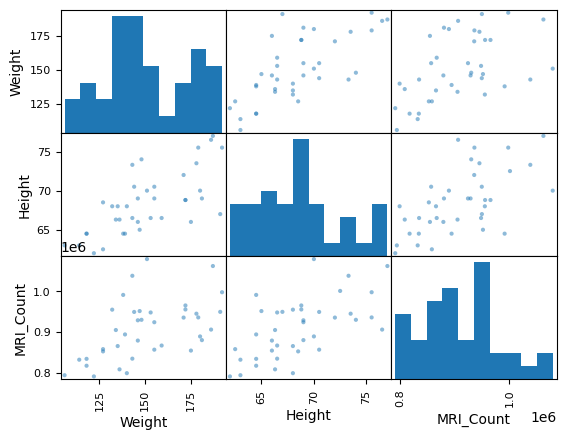

In [11]:
import pandas.plotting as plotting
plotting.scatter_matrix(df[['Weight','Height','MRI_Count']])

array([[<AxesSubplot:xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

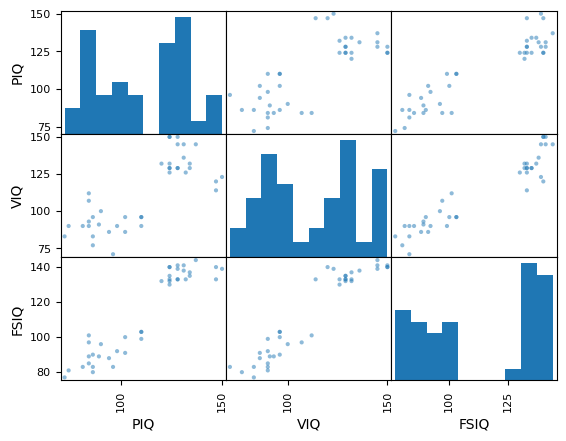

In [12]:
plotting.scatter_matrix(df[['PIQ','VIQ','FSIQ']])

By creating a scatterplot matrix, you can quickly visualize the relationships between multiple variables in a dataset, allowing you to identify potential patterns or trends. For example, you might be able to identify a relationship between weight and height, or between MRI count and IQ scores. The scatterplot matrix can also be useful for identifying potential outliers or unusual observations in the data.

# Two populations:
the IQ metris are bimodal as if there are 2 sub-popilations.
When a distribution is bimodal, it means that it has two distinct peaks or modes, which may suggest the presence of two sub-populations with different characteristics. This can be seen in IQ metrics if there are two groups of individuals with different levels of cognitive ability.

It is important to note that bimodal distributions can also be the result of other factors, such as measurement error, random sampling variability, or environmental factors. Therefore, it is important to carefully consider the data and investigate the underlying causes of the bimodal distribution.

Plot the sactter matrix for males only and for females only.

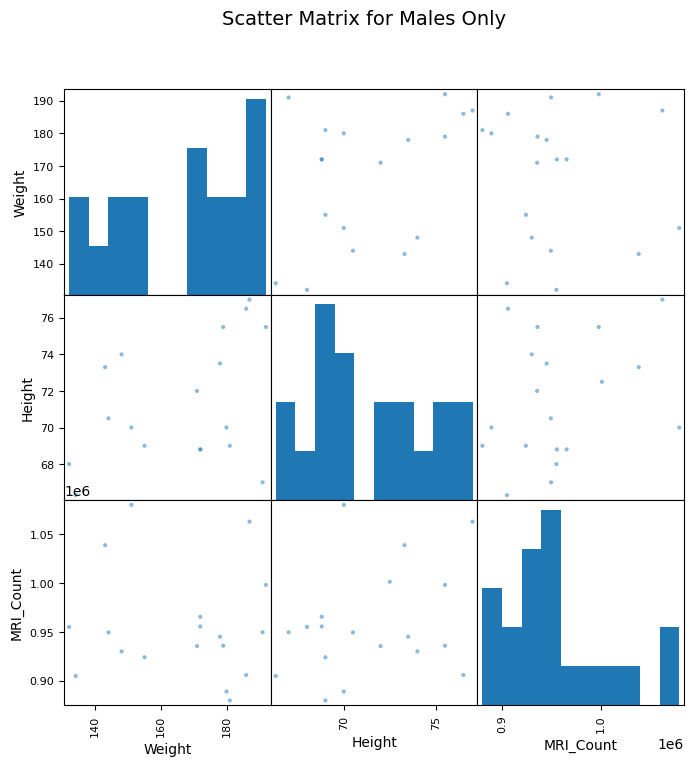

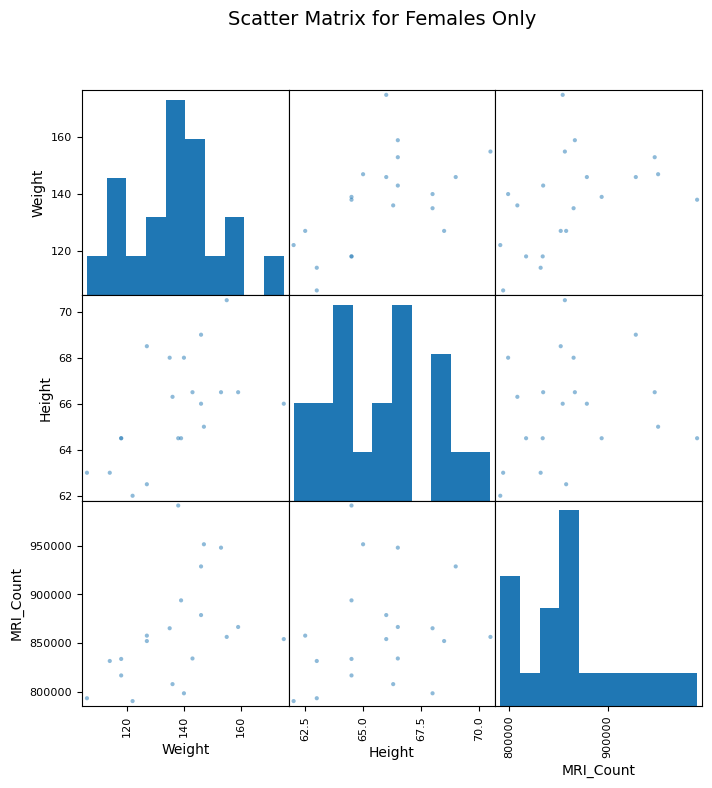

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate the data by gender
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

# Plot the scatter matrix for males only
male_scatter_matrix = pd.plotting.scatter_matrix(male_df[['Weight', 'Height', 'MRI_Count']], figsize=(8, 8))
plt.suptitle('Scatter Matrix for Males Only', fontsize=14)

# Plot the scatter matrix for females only
female_scatter_matrix = pd.plotting.scatter_matrix(female_df[['Weight', 'Height', 'MRI_Count']], figsize=(8, 8))
plt.suptitle('Scatter Matrix for Females Only', fontsize=14)

plt.show()


In order to interpret IQ scores based on FSIQ, VIQ, and PIQ, we have to understand what each of these scores represents.

FSIQ, or Full Scale IQ, is a composite score that represents an individual's overall cognitive ability, derived from several subtests that assess different aspects of intellectual functioning.

VIQ, or Verbal IQ, is a score that represents an individual's verbal or language abilities, including vocabulary, comprehension, and verbal reasoning.

PIQ, or Performance IQ, is a score that represents an individual's nonverbal or performance abilities, including spatial processing, perceptual reasoning, and problem-solving using visual information.

To interpret these scores, we can  compare an individual's FSIQ to the general population's IQ scores. A score of 100 is considered average, with scores between 85-115 being within the normal range. Scores below 70 indicate intellectual disability, and scores above 130 indicate above-average intellectual ability.

we can also compare the individual's VIQ and PIQ scores to each other to determine if there is a significant difference between their verbal and nonverbal abilities. A significant difference may indicate a cognitive processing difference, such as a learning disability or a strength in a particular area.

# Hypothesis testing: Comparing two groups
For simple statistical test, we will use the scipy.stats sub-module of scipy:

In [14]:
from scipy import stats

# 1-sample t-test: testing: the simplest statistical test

In [15]:
stats.ttest_1samp(df['VIQ'],0 ) 

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

with a p-value of (10^-28) we can claim that the population mean for the
IQ(VIQ measure) is not zero

# 2- sample t-test: testing for difference across populations

we have seen that the mean VIQ in the male and female populations were
different.To test if thsi is significat, we do a 2-sample t-test

In [16]:
# female_viq = df[df['Gender']== 'Female']['VIQ']
# male_viq = df[df['Gender']== 'male']['VIQ']
# stats.ttest_ind(female_viq, male_viq)
# we shuld remove NAN value 

In [17]:
female_viq = df[df['Gender'] == 'Female']['VIQ'].dropna()
male_viq = df[df['Gender'] == 'Male']['VIQ'].dropna()
stats.ttest_ind(female_viq, male_viq)


Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

# Interpretaion 

The t-statistic is -0.7726 and the p-value is 0.4445. 
The p-value is greater than the common significance level of 0.05, 
which suggests that there is not enough evidence to reject the null hypothesis of equal means.

Therefore, we can conclude that we do not have significant evidence to suggest that there 
is a difference in the mean VIQ scores between the two groups (male and female) in the population, based on the data that we have.

# Paired test: repeated measurements on the same indivuals

PIQ, VIQ and FSIQ give 3 measures of IQ. Let use test if FISQ and PIQ
are significantly different. we can use a 2 sample test:

In [18]:
stats.ttest_ind(df['FSIQ'], df['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

The interpretation of these result depends on the level of significanve
(alpha) chosen for the test. if alpha is set to 0.05. In our case p-value is 
is grater than 0.05, we would fail to reject the null hypotheis and conclude
that there is not enough evidence to support a significance diffrence.

The problem with this approach is that it forgets that there
are links betwen observations. FSIQ and PIQ are
measured on the same individuals. thus the variance due to
inter-subject variability is confounding, and can be removed
using a paired test or repeated measures test:

When measuring two different variables on the same individuals, as in the case of FSIQ and PIQ, there is a possibility of inter-subject variability confounding the results. This means that the differences observed between the individuals in terms of their FSIQ and PIQ scores may not necessarily be due to the variables being measured, but rather due to differences between the individuals themselves.

To address this issue, a paired test or a repeated measures test can be used. These tests take into account the fact that the same individuals are being measured on both variables, and aim to remove the confounding effects of inter-subject variability.

A paired test involves comparing the scores of the same individuals on both variables. This can be done by calculating the difference between the two scores for each individual, and then testing whether the mean difference is significantly different from zero. This approach removes the effects of inter-subject variability, as each individual serves as their own control.

A repeated measures test involves measuring the same individuals on both variables at different time points or under different conditions. This approach also takes into account the fact that the same individuals are being measured on both variables, and aims to remove the effects of inter-subject variability by controlling for the time or condition effects.

Overall, using a paired or repeated measures test can help to address the issue of inter-subject variability confounding the results of studies that measure multiple variables on the same individuals

When measuring two different variables on the same individuals means that the same group of individuals is being assessed or tested for two different characteristics or traits. For example, in a cognitive psychology study, researchers may measure both the participants' working memory capacity and their attention span. In a medical study, researchers may measure both the participants' blood pressure and their heart rate. By measuring multiple variables on the same individuals, researchers can investigate how different characteristics are related or influence each other. However, as mentioned earlier, it's important to consider the possibility of inter-subject variability confounding the results, and use appropriate statistical tests to control for this.

Inter-subject variability refers to differences between individuals in a study that are not related to the variables being measured. For example, in a study measuring both FSIQ and PIQ on the same group of individuals, there may be differences in intelligence or cognitive ability between the individuals that are not related to FSIQ or PIQ. These differences can potentially confound the results of the study, making it difficult to determine whether any observed differences between FSIQ and PIQ scores are actually due to the variables being measured or due to inter-subject variability.

To control for inter-subject variability, appropriate statistical tests can be used. For example, in the case of measuring FSIQ and PIQ on the same group of individuals, a paired t-test or a repeated measures ANOVA can be used. These tests take into account the fact that the same individuals are being measured on both variables, and compare the differences between the two scores within each individual, rather than across individuals. By doing so, any inter-subject variability that is not related to the variables being measured is controlled for, and the statistical power of the test is increased.

It's important to note that using appropriate statistical tests is not the only consideration when controlling for inter-subject variability. Other factors, such as participant selection, sample size, and experimental design, also play a role in minimizing the effects of inter-subject variability. Therefore, researchers should carefully consider all these factors when designing and analyzing studies that measure multiple variables on the same individuals.

This is equivalent to a 1-sample test on the differnce:

In [19]:
stats.ttest_1samp(df['FSIQ']-df['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

T-test assueme Gaussian error. we can use a Wilcoxon signed-rank test
that relaxex this assumption.

In [20]:
stats.wilcoxon(df['FSIQ'], df['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

Conclusion: From the given data I conclude that IQ and gender are not related from this study.